In [6]:
from __future__ import print_function
import numpy as np
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import sys
import pandas as pd
from astropy.table import Table
#import StringIO
from scipy.optimize import fsolve
import os
from astropy.io import fits
from scipy.interpolate import interp1d

In [7]:
def filter_mag(e, s, f1, f2, f3):
    '''
    Calculate the colors using any of set of filters
    '''
    col, col0 = [], []
    if data['id'].endswith(e):
        if data['id'].startswith(str(s)):
            filter1 = data[f1]
            filter2 = data[f2]
            filter3 = data[f3]
            diff = filter1 - filter2
            diff0 = filter1 - filter3
            col.append(diff)
            col0.append(diff0)
    
    return col, col0

In [8]:
def plot_mag(f1, f2, f3):
    x, y = filter_mag("Star", "", f1, f2, f3)
    for a, b in zip(x, y):
        A1.append(a)
        B1.append(b)

In [9]:
# Sintectin MS track
A1, B1 = [], []

pattern = "../../MS_stars/*.json"
file_list = glob.glob(pattern)
for file_name in file_list:
    with open(file_name) as f:
        data = json.load(f)
        plot_mag("F0626_rSDSS", "F0660", "F0769_iSDSS")

In [16]:
# Convert A1 and B1 to numpy arrays
A1 = np.array(A1)
B1 = np.array(B1)

# Define the number of bins
num_bins = 10

# Calculate bin edges
bin_edges = np.linspace(min(B1), max(B1), num_bins + 1)

# Calculate the indices of the bins to which each value in B1 belongs
bin_indices = np.digitize(B1, bin_edges)

# Calculate the mean value of A1 for each bin
mean_A1_bins = [np.mean(A1[bin_indices == i]) for i in range(1, num_bins + 1)]

# Calculate the mean value of B1 for each bin
mean_B1_bins = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(num_bins)]

/tmp/ipykernel_6605/3907588882.py:17: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=B1, y=A1, cmap='viridis', ax=ax, shade=True, shade_lowest=False, zorder=1)
/tmp/ipykernel_6605/3907588882.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=B1, y=A1, cmap='viridis', ax=ax, shade=True, shade_lowest=False, zorder=1)


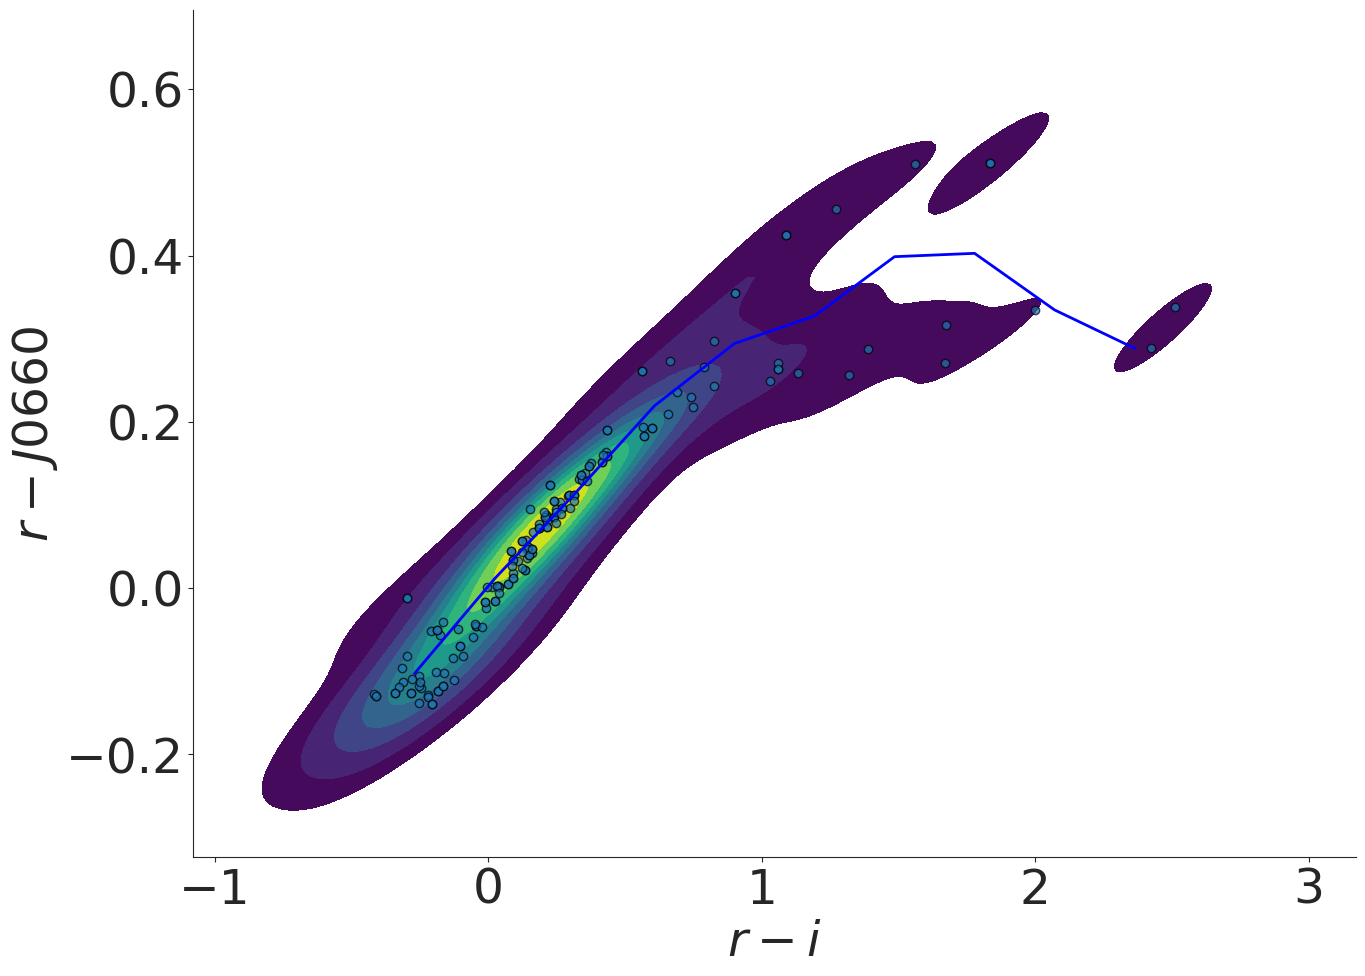

In [17]:
# Plots
color_map = plt.cm.Spectral_r
color_palette = sns.color_palette('Paired', 55)
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    plt.xlabel(r"$r - i$", fontsize=35)
    plt.ylabel(r"$r - J0660$", fontsize=35)
    plt.tick_params(axis='x', labelsize=35) 
    plt.tick_params(axis='y', labelsize=35)

    # Create scatter plot
    scat = ax.scatter(B1, A1, edgecolor='black', alpha=0.7, zorder=2, cmap='hot')

    # Create density plot
    sns.kdeplot(x=B1, y=A1, cmap='viridis', ax=ax, shade=True, shade_lowest=False, zorder=1)

    # Draw smooth curve connecting mean values in bins
    ax.plot(mean_B1_bins, mean_A1_bins, color='blue', linestyle='-', linewidth=2)

    # Symbol size indicates outer shell radius
    # plt.text(0.02, 0.95, 'Symbol size indicates FWHM',
    #         transform=ax.transAxes, fontsize=22)

    # main sequence and giant stars loci
    x1, y1 = 0.3, 0.3